In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
data_file = '/content/dermatology_database_1.csv'
data = pd.read_csv(data_file)
print("Data Head:")
print(data.head())

Data Head:
   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                          

In [7]:
data.replace('?', np.nan, inplace=True)
data = data.dropna()

In [8]:
data = data.apply(pd.to_numeric)

In [9]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Results:
Accuracy: 0.7083333333333334
Classification Report:
               precision    recall  f1-score   support

           1       0.81      1.00      0.90        22
           2       0.48      1.00      0.65        14
           3       1.00      0.93      0.96        14
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        12
           6       0.67      1.00      0.80         2

    accuracy                           0.71        72
   macro avg       0.49      0.65      0.55        72
weighted avg       0.56      0.71      0.61        72



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Results:
Accuracy: 0.9861111111111112
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        14
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         2

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



In [43]:
data_file = '/content/dermatology_database_1.csv'
data = pd.read_csv(data_file)

In [44]:
data.replace('?', np.nan, inplace=True)
data = data.dropna()

In [45]:
data = data.apply(pd.to_numeric)

In [46]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05, random_state=42)
outlier_predictions = iso.fit_predict(data)

data = data[outlier_predictions == 1]

In [47]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("SVM Results after Outlier Removal:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Results after Outlier Removal:
Accuracy: 0.7058823529411765
Classification Report:
               precision    recall  f1-score   support

           1       0.85      1.00      0.92        22
           2       0.38      0.82      0.51        11
           3       1.00      1.00      1.00        15
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        11
           6       0.67      1.00      0.80         2

    accuracy                           0.71        68
   macro avg       0.48      0.64      0.54        68
weighted avg       0.57      0.71      0.62        68



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Results after Outlier Removal:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Results after Outlier Removal:
Accuracy: 0.9705882352941176
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       0.91      0.91      0.91        11
           3       1.00      1.00      1.00        15
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         2

    accuracy                           0.97        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0.97      0.97      0.97        68



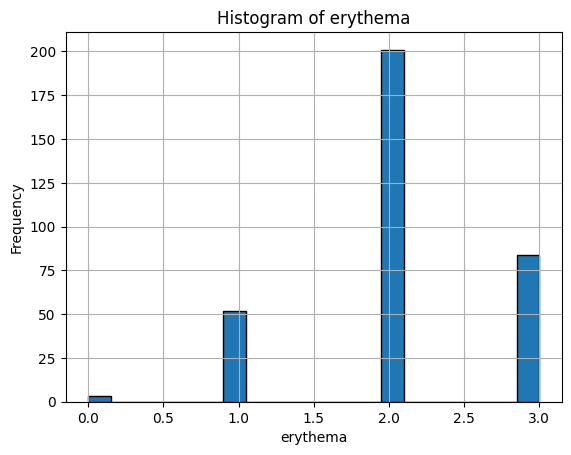

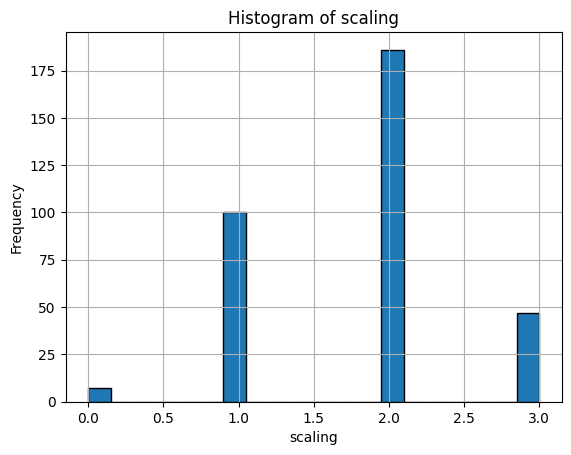

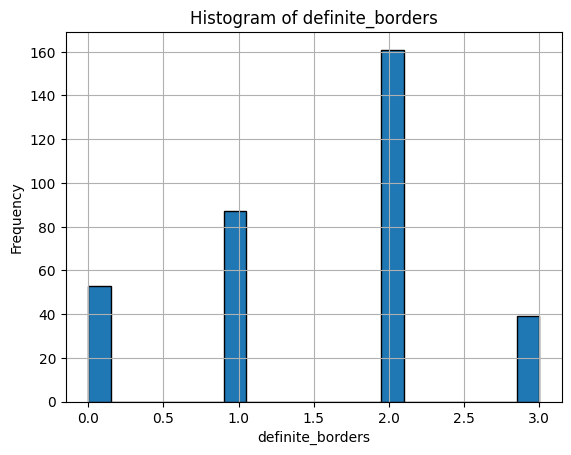

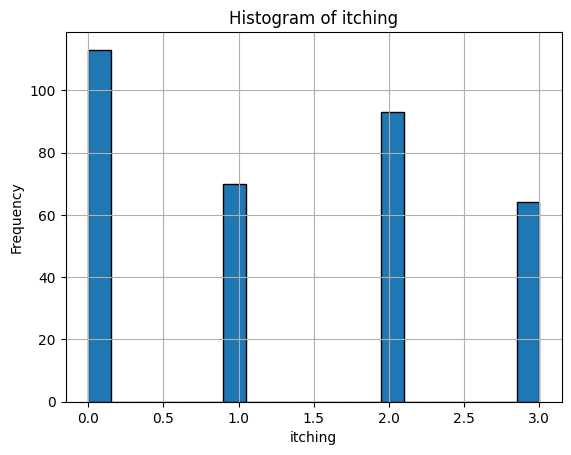

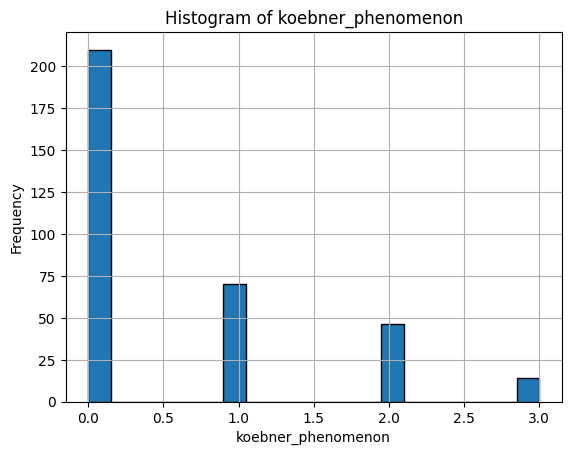

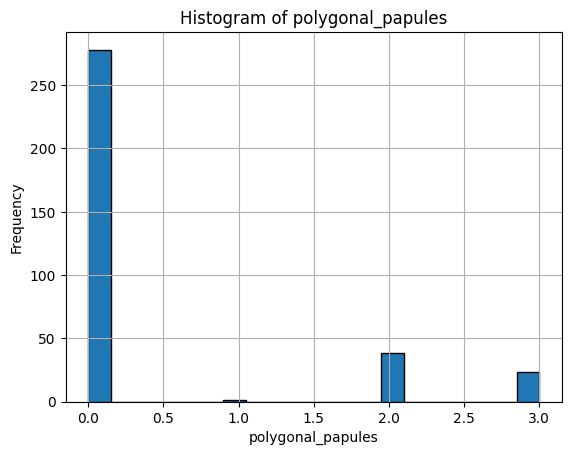

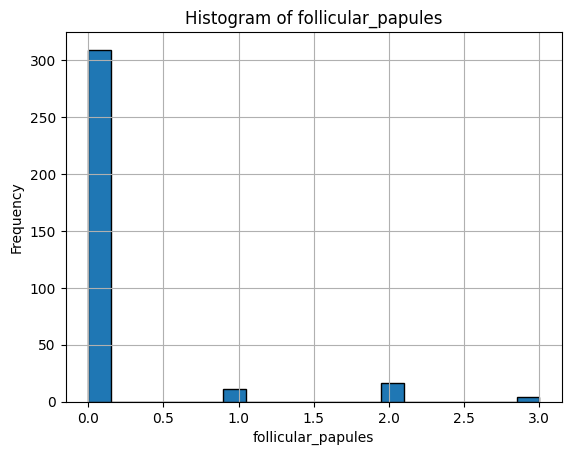

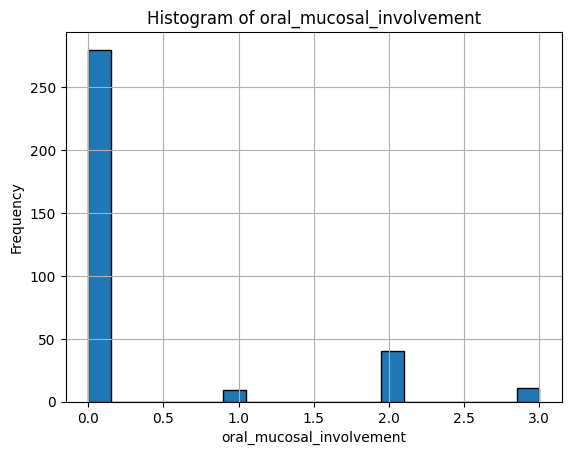

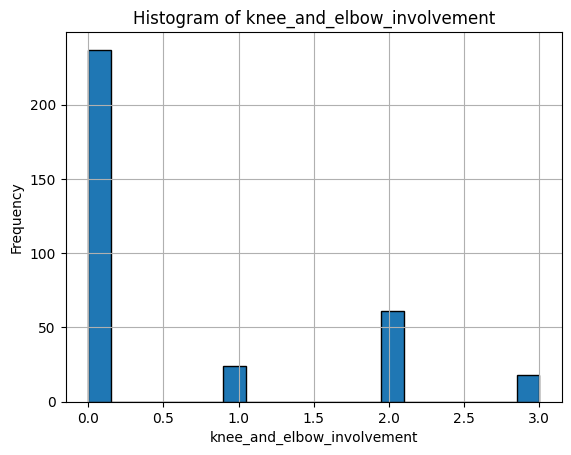

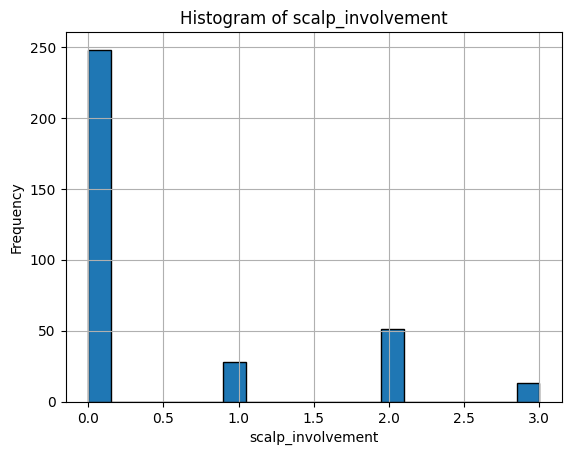

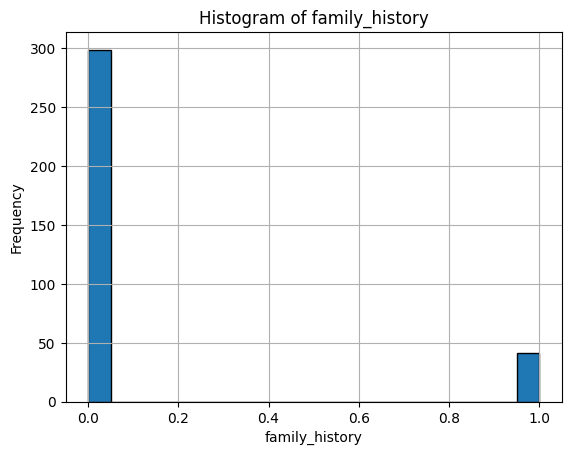

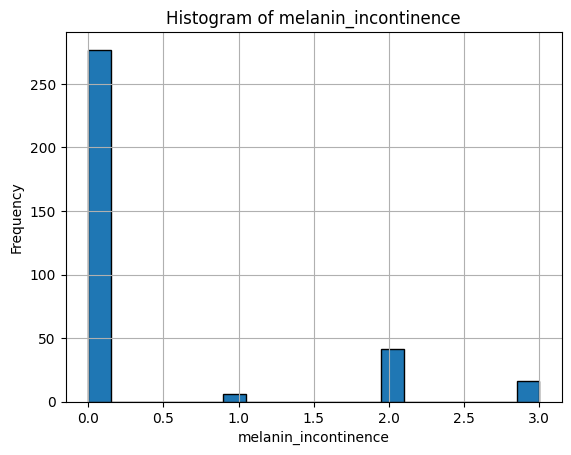

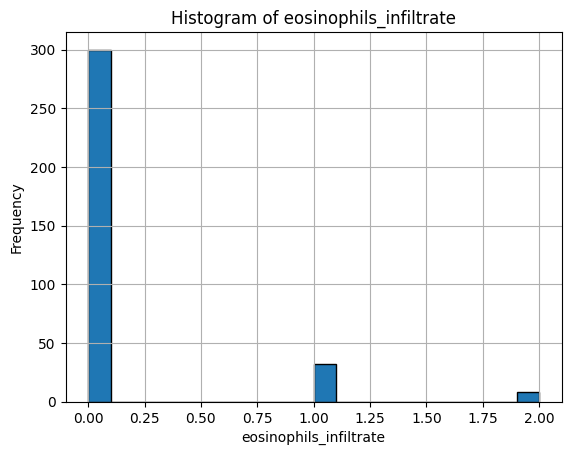

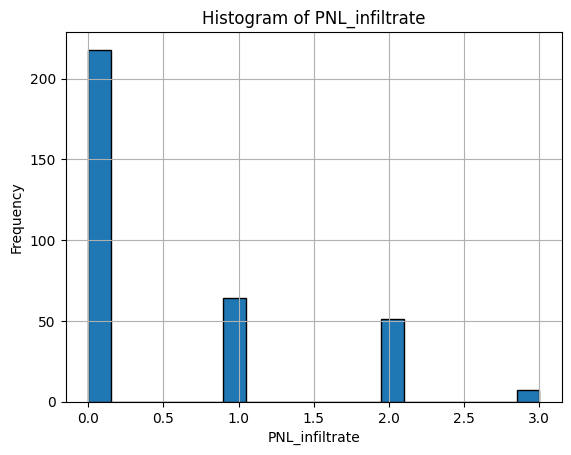

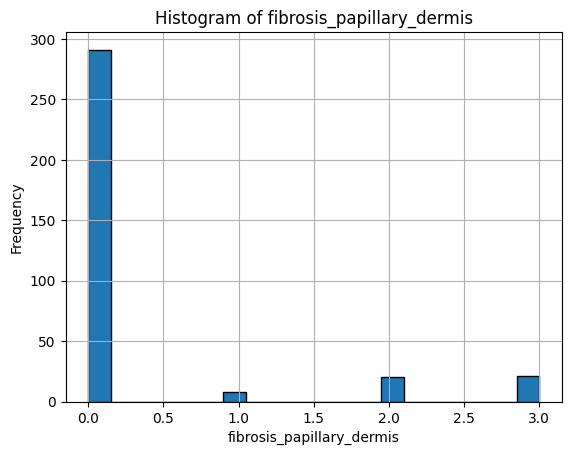

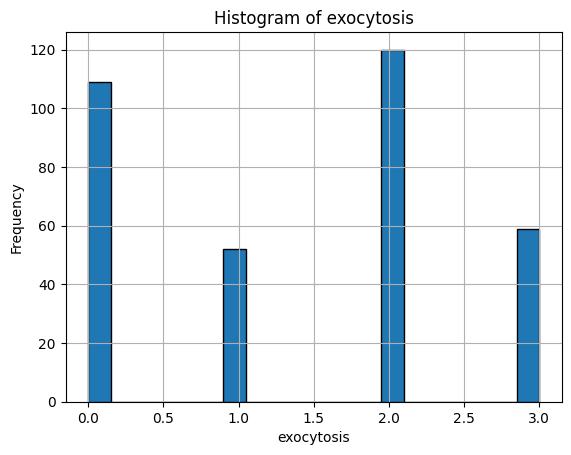

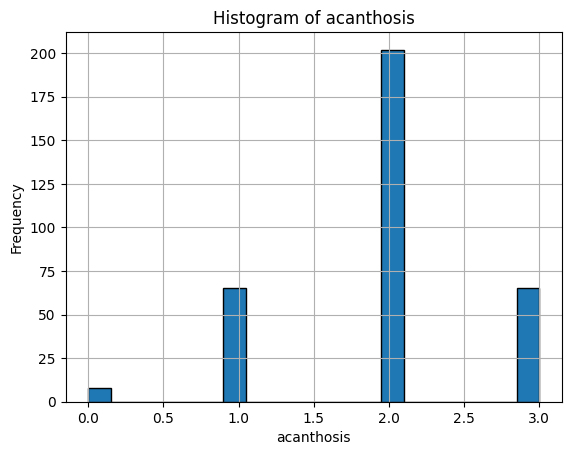

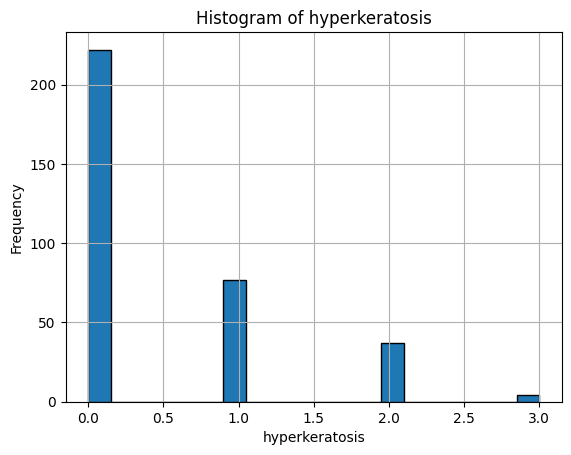

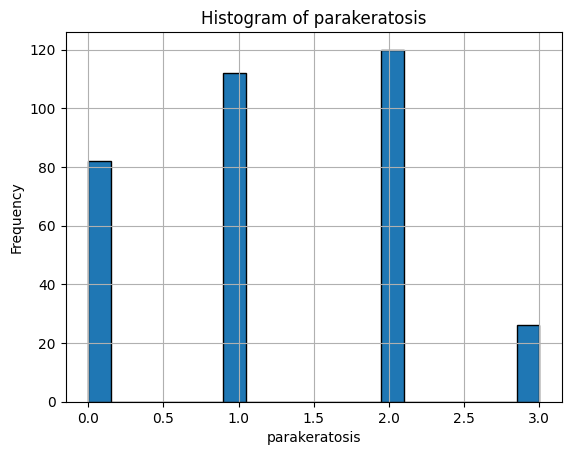

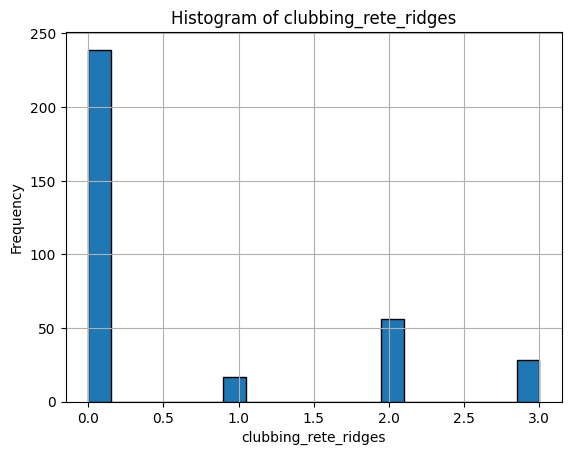

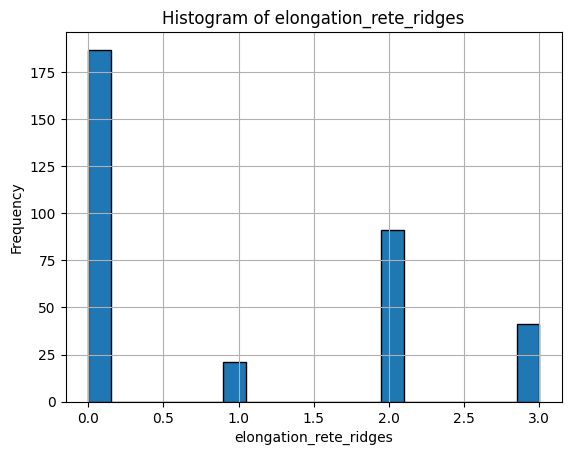

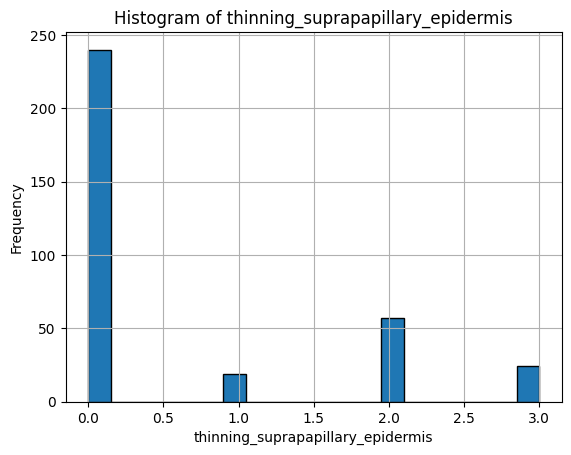

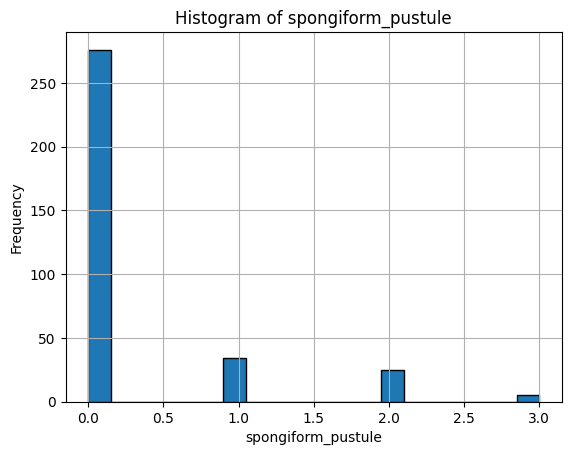

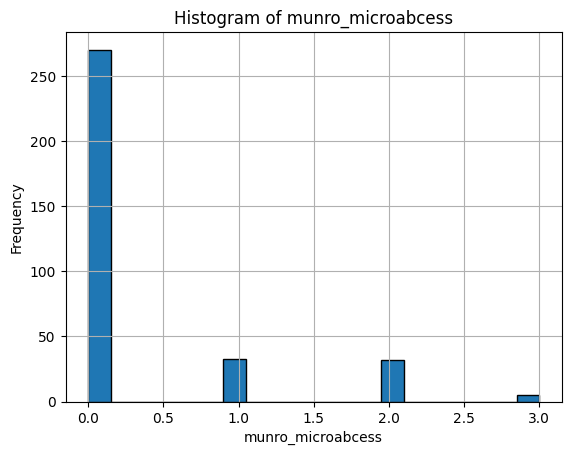

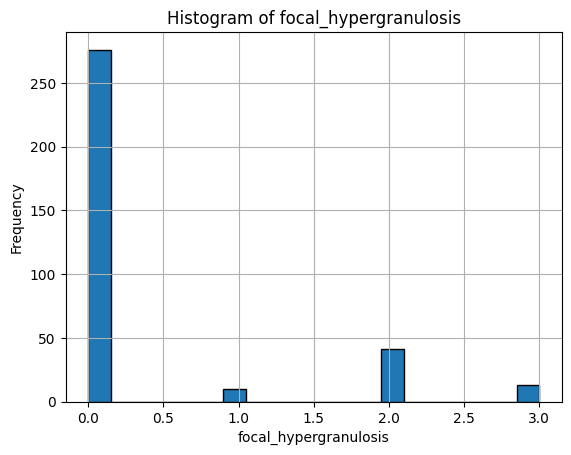

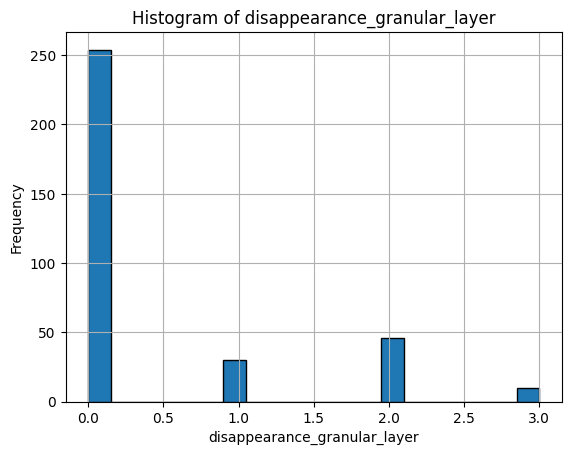

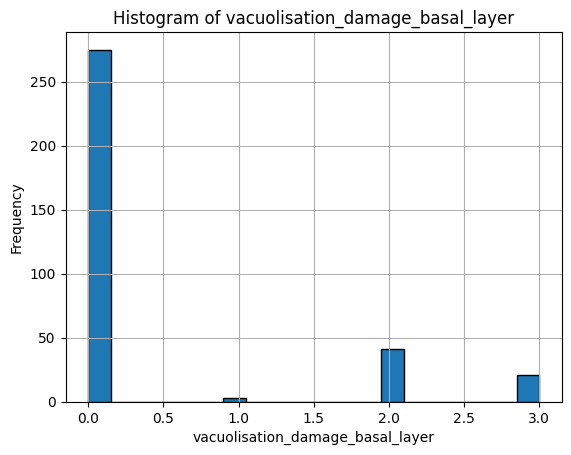

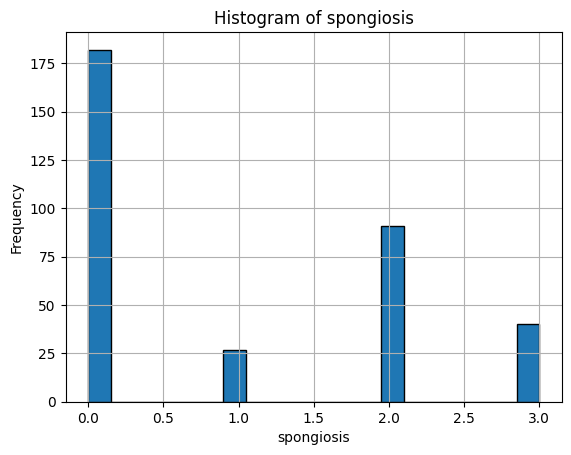

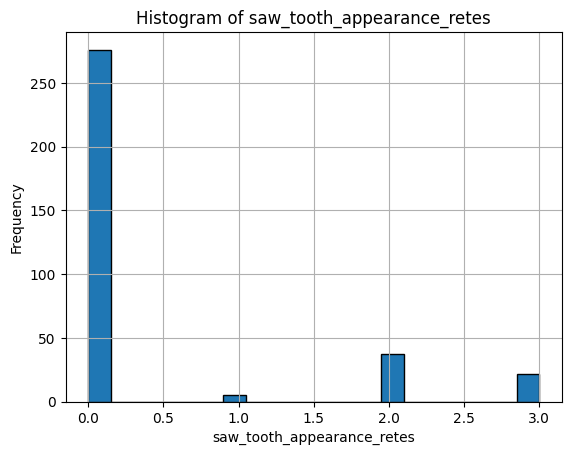

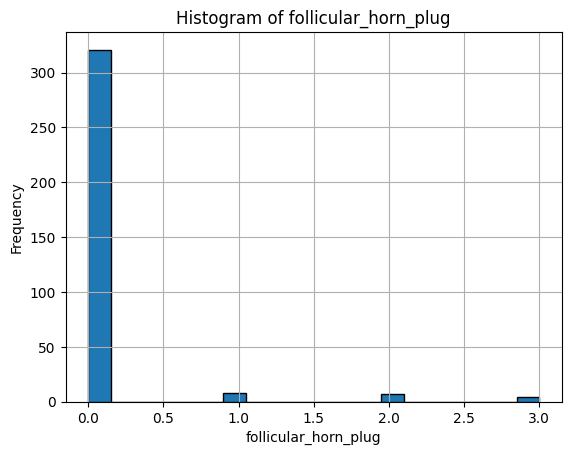

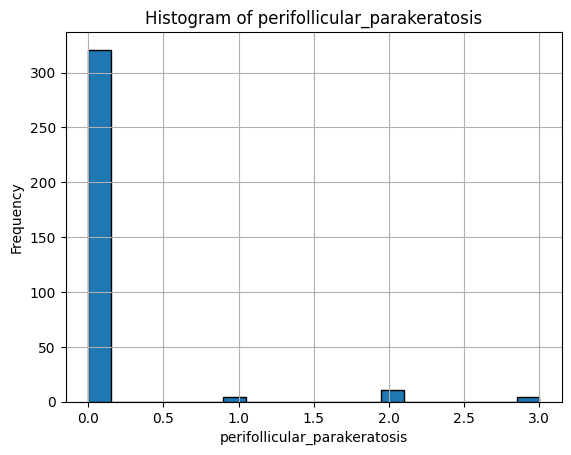

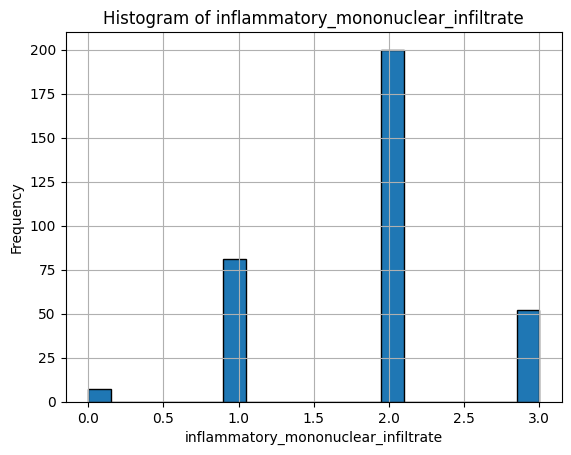

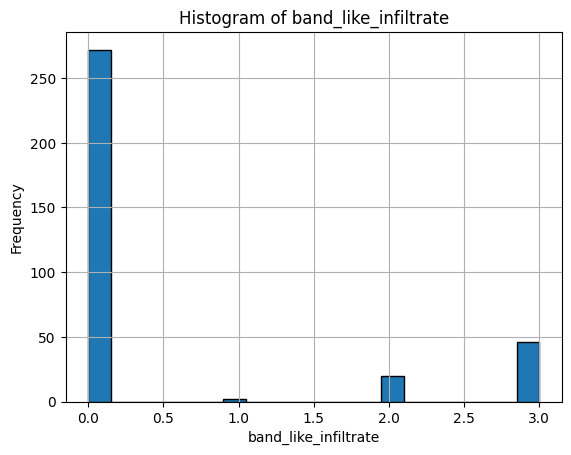

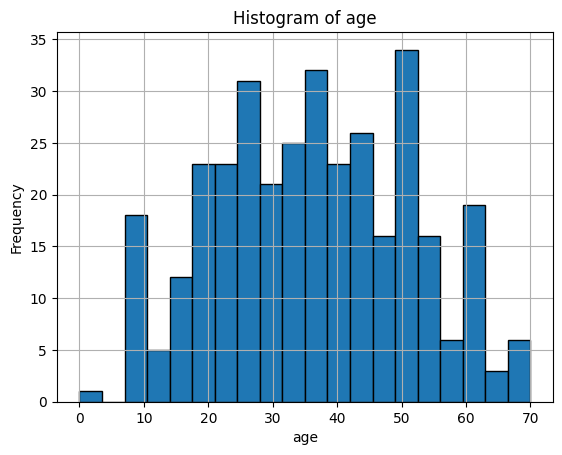

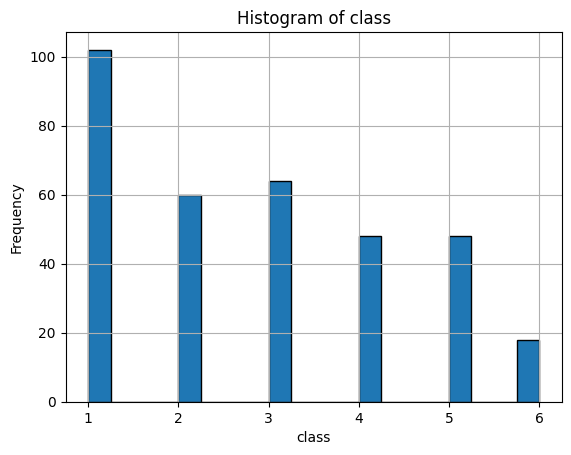

In [41]:
import matplotlib.pyplot as plt
for column in data.columns:
    plt.figure()
    data[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()